# PREPROCESSING AND MODELING PROCESS

In [43]:
import pandas as pd
import json
import ast
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df_data = pd.read_csv("full_data.csv")
df_data.shape

(44228, 47)

In [45]:
df_data

,fixture_id,League,season,season_id,round,date,month,day_of_week,side,main_team,...,main_team_rk,rival_team_rk,participants,statistics,events,clouds,feels_like,humidity,temperature,wind_speed
0,10330209,Ligue 1,18-19,12935,3.0,2018-08-25 18:00:00,1,6,A,Reims,...,1.0,5.0,"[{'id': 1028, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787413, 'fixture_id': 10330209, 'type...","[{'id': 32406872, 'fixture_id': 10330209, 'per...",NaN,NaN,NaN,NaN,NaN
1,10330209,Ligue 1,18-19,12935,3.0,2018-08-25 18:00:00,1,6,H,Amiens SC,...,5.0,1.0,"[{'id': 1028, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787413, 'fixture_id': 10330209, 'type...","[{'id': 32406872, 'fixture_id': 10330209, 'per...",NaN,NaN,NaN,NaN,NaN
2,10330210,Ligue 1,18-19,12935,3.0,2018-08-26 15:00:00,1,7,A,Monaco,...,2.0,5.0,"[{'id': 3562, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787511, 'fixture_id': 10330210, 'type...","[{'id': 32406803, 'fixture_id': 10330210, 'per...",NaN,NaN,NaN,NaN,NaN
3,10330210,Ligue 1,18-19,12935,3.0,2018-08-26 15:00:00,1,7,H,Bordeaux,...,5.0,2.0,"[{'id': 3562, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787511, 'fixture_id': 10330210, 'type...","[{'id': 32406803, 'fixture_id': 10330210, 'per...",NaN,NaN,NaN,NaN,NaN
4,10330211,Ligue 1,18-19,12935,3.0,2018-08-26 13:00:00,1,7,A,Guingamp,...,5.0,2.0,"[{'id': 690, 'sport_id': 1, 'country_id': 17, ...","[{'id': 3787449, 'fixture_id': 10330211, 'type...","[{'id': 32407050, 'fixture_id': 10330211, 'per...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44223,19167985,Serie B,24-25,23839,33.0,2025-04-12 13:00:00,9,6,H,Reggiana,...,14.0,2.0,"[{'id': 2892, 'sport_id': 1, 'country_id': 251...","[{'id': 356436184, 'fixture_id': 19167985, 'ty...","[{'id': 149684317, 'fixture_id': 19167985, 'pe...",76.0,16.48,56.0,17.12,2.55
44224,19167986,Serie B,24-25,23839,33.0,2025-04-12 13:00:00,9,6,A,Südtirol,...,12.0,15.0,"[{'id': 176, 'sport_id': 1, 'country_id': 251,...","[{'id': 356393614, 'fixture_id': 19167986, 'ty...","[{'id': 149685958, 'fixture_id': 19167986, 'pe...",100.0,14.38,77.0,14.62,1.78
44225,19167986,Serie B,24-25,23839,33.0,2025-04-12 13:00:00,9,6,H,Salernitana,...,15.0,12.0,"[{'id': 176, 'sport_id': 1, 'country_id': 251,...","[{'id': 356393614, 'fixture_id': 19167986, 'ty...","[{'id': 149685958, 'fixture_id': 19167986, 'pe...",100.0,14.38,77.0,14.62,1.78
44226,19167987,Serie B,24-25,23839,33.0,2025-04-12 15:15:00,9,6,A,Cittadella,...,12.0,14.0,"[{'id': 8485, 'sport_id': 1, 'country_id': 251...","[{'id': 356956919, 'fixture_id': 19167987, 'ty...","[{'id': 149693032, 'fixture_id': 19167987, 'pe...",47.0,18.89,68.0,19.95,5.58


In [46]:
# df_summary = df_data.groupby("main_team_formation").agg({
#     "main_team_acc_goals": "mean",
#     "main_team_acc_red_cards": "mean",
#     "main_team_acc_yellow_cards": "mean",
#     "main_team_acc_possession": "mean",
#     "main_team_acc_corners": "mean"
# }).rename(columns={
#     "main_team_acc_goals": "goals_avg",
#     "main_team_acc_red_cards": "red_cards_avg",
#     "main_team_acc_yellow_cards": "yellow_cards_avg",
#     "main_team_acc_possession": "possession_avg",
#     "main_team_acc_corners": "corners_avg"
# }).reset_index()
# df_summary.round(3)

In [47]:
df_data.sample(5)

,fixture_id,League,season,season_id,round,date,month,day_of_week,side,main_team,...,main_team_rk,rival_team_rk,participants,statistics,events,clouds,feels_like,humidity,temperature,wind_speed
18868,18156663,Bundesliga,21-22,18444,8.0,2021-10-16 13:30:00,3,6,H,SC Freiburg,...,2.0,5.0,"[{'id': 3543, 'sport_id': 1, 'country_id': 11,...","[{'id': 1832069, 'fixture_id': 18156663, 'type...","[{'id': 3422169, 'fixture_id': 18156663, 'peri...",NaN,NaN,NaN,NaN,NaN
26625,18544591,Championship (2nd UK),22-23,19793,21.0,2022-11-12 15:00:00,4,6,H,Coventry City,...,4.0,5.0,"[{'id': 117, 'sport_id': 1, 'country_id': 462,...","[{'id': 7283438, 'fixture_id': 18544591, 'type...","[{'id': 64220272, 'fixture_id': 18544591, 'per...",NaN,NaN,NaN,NaN,NaN
20879,18202229,Primeira Liga,21-22,18529,5.0,2021-09-12 17:00:00,2,7,A,Vizela,...,6.0,4.0,"[{'id': 8164, 'sport_id': 1, 'country_id': 20,...","[{'id': 1515169, 'fixture_id': 18202229, 'type...","[{'id': 3208270, 'fixture_id': 18202229, 'peri...",71.0,26.47,48.0,26.47,3.55
25132,18536717,Bundesliga,22-23,19744,7.0,2022-09-17 13:30:00,2,6,H,Borussia Dortmund,...,3.0,7.0,"[{'id': 67, 'sport_id': 1, 'country_id': 11, '...","[{'id': 6115262, 'fixture_id': 18536717, 'type...","[{'id': 45837972, 'fixture_id': 18536717, 'per...",53.0,12.53,67.0,13.39,5.98
34446,18860718,Ligue 1,23-24,21779,28.0,2024-04-07 18:45:00,9,7,A,Olympique Lyonnais,...,8.0,11.0,"[{'id': 59, 'sport_id': 1, 'country_id': 17, '...","[{'id': 28918383, 'fixture_id': 18860718, 'typ...","[{'id': 110701620, 'fixture_id': 18860718, 'pe...",99.0,-0.55,82.0,2.49,4.03


In [48]:
#Create a column which is the main_team_formation concatenated with "_" and the rival_team_formation
df_data["combined_formation"] = df_data["main_team_formation"] + "/" + df_data["rival_team_formation"]
print(df_data["combined_formation"].value_counts())
print(len(df_data["combined_formation"].unique()))

combined_formation
4-2-3-1/4-2-3-1    4524
4-3-3/4-3-3        2370
4-3-3/4-2-3-1      2324
4-2-3-1/4-3-3      2324
4-2-3-1/4-4-2      1951
4-4-2/4-2-3-1      1951
4-4-2/4-4-2        1640
3-5-2/3-5-2        1608
4-2-3-1/3-5-2      1529
3-5-2/4-2-3-1      1529
3-4-3/4-2-3-1      1442
4-2-3-1/3-4-3      1442
4-3-3/3-5-2        1441
3-5-2/4-3-3        1441
4-4-2/4-3-3        1324
4-3-3/4-4-2        1324
5-4-1/4-2-3-1      1243
4-2-3-1/5-4-1      1243
3-4-3/3-4-3        1176
3-5-2/3-4-3        1001
3-4-3/3-5-2        1001
3-4-3/4-3-3         862
4-3-3/3-4-3         862
4-4-2/3-5-2         745
3-5-2/4-4-2         745
4-4-2/3-4-3         630
3-4-3/4-4-2         630
5-4-1/4-4-2         617
4-4-2/5-4-1         617
5-4-1/4-3-3         492
4-3-3/5-4-1         492
3-4-3/5-4-1         407
5-4-1/3-4-3         407
5-4-1/5-4-1         310
5-4-1/3-5-2         292
3-5-2/5-4-1         292
Name: count, dtype: int64
36


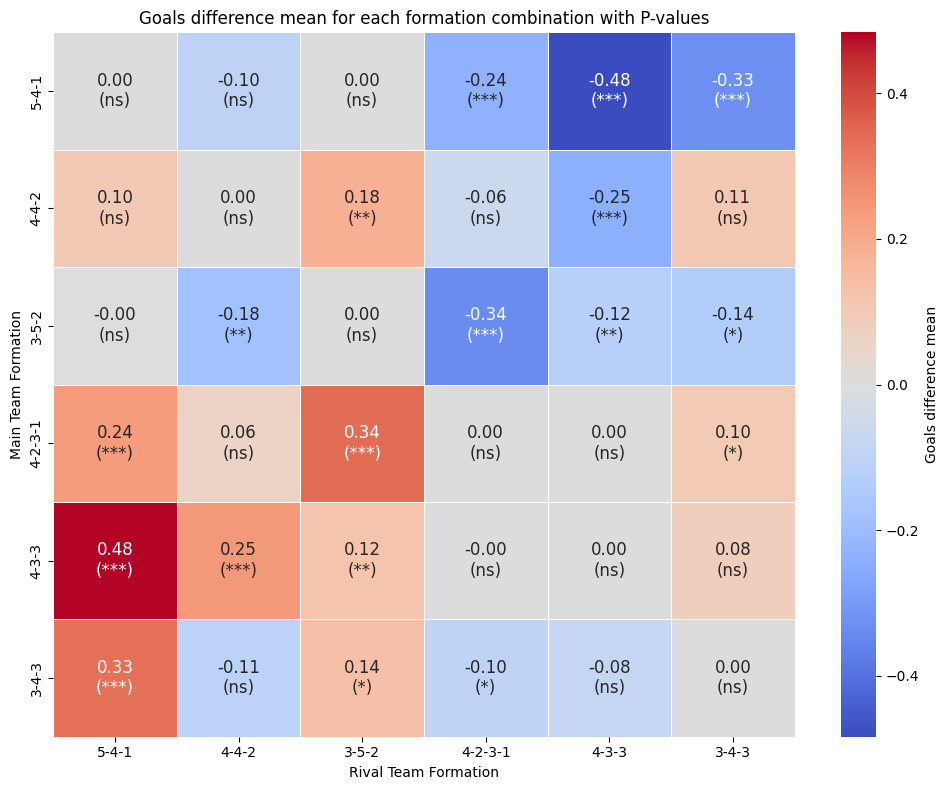

In [72]:
from scipy.stats import ttest_1samp

# Create a matrix with the mean of "goals_diff" for each combination of main_team_formation and rival_team_formation
sorted_formations = ["5-4-1","4-4-2","3-5-2","4-2-3-1","4-3-3","3-4-3"] 
# Prepare an empty DataFrame for p-values
pvalue_matrix = pd.DataFrame(index=sorted_formations, columns=sorted_formations, dtype=float)

# Calculate p-value for each cell
for main in sorted_formations:
    for rival in sorted_formations:
        values = df_data[
            (df_data["main_team_formation"] == main) &
            (df_data["rival_team_formation"] == rival)
        ]["goals_diff"].dropna()
        if len(values) > 1:
            # Test if mean is different from 0
            stat, pval = ttest_1samp(values, 0)
            pvalue_matrix.loc[main, rival] = pval
        else:
            pvalue_matrix.loc[main, rival] = np.nan

        
mean_goals_diff_matrix = df_data.pivot_table(
    index="main_team_formation",
    columns="rival_team_formation",
    values="goals_diff",
    aggfunc="mean"
).reindex(index=sorted_formations, columns=sorted_formations)

# Create an annotation matrix with mean and significance stars
annotations = mean_goals_diff_matrix.copy().astype(str)

for row in sorted_formations:
    for col in sorted_formations:
        mean_val = mean_goals_diff_matrix.loc[row, col]
        pval = pvalue_matrix.loc[row, col]
        # Assign significance stars
        if pd.isna(pval):
            sig = ""
        elif pval < 0.001:
            sig = "***"
        elif pval < 0.01:
            sig = "**"
        elif pval < 0.05:
            sig = "*"
        else:
            sig = "ns"
        # Format annotation: mean (stars)
        if not pd.isna(mean_val):
            annotations.loc[row, col] = f"{mean_val:.2f}\n({sig})"
        else:
            annotations.loc[row, col] = ""

plt.figure(figsize=(10, 8))
sns.heatmap(mean_goals_diff_matrix, annot=annotations, fmt="", linewidths=.6, cmap="coolwarm", 
            cbar_kws={'label': 'Goals difference mean'}, annot_kws={"size": 12})

plt.title("Goals difference mean for each formation combination with P-values")
plt.ylabel("Main Team Formation")
plt.xlabel("Rival Team Formation")
plt.tight_layout()
plt.show()

In [50]:

D_col = "combined_formation"
 

#WE USE THE FOLLOWING VARIABLES TO ADDRESS IN A MORE GENERIC WAY (DO NOT CONSIDER EXACT PROFILES SUCH AS BARÇA'S POSSESSION+CORNERS+GOALS...) 
X_values_list = [
    # 'League', 'season', 'main_team', 'rival_team', 
    'season_id','round',
    'day_of_week', 'side', 
      #  'rival_team_formation',
       'main_team_acc_pointsL','main_team_acc_pointsA','rival_team_acc_pointsL', 
       'rival_team_acc_pointsA','main_team_plays_CL', 'rival_team_plays_CL',
       'main_team_rk', 'rival_team_rk','clouds', 'feels_like', 'humidity', 'temperature','wind_speed',
       "combined_formation" #Then it will be removed from the list of features
       , "month" #We leave month just for the knn imputer in the weather.
       ]

# y = "winner" 
target1 = "goals_diff"

In [51]:
df_data[X_values_list].tail()

,season_id,round,day_of_week,side,main_team_acc_pointsL,main_team_acc_pointsA,rival_team_acc_pointsL,rival_team_acc_pointsA,main_team_plays_CL,rival_team_plays_CL,main_team_rk,rival_team_rk,clouds,feels_like,humidity,temperature,wind_speed,combined_formation,month
44223,23839,33.0,6,H,0.375000,0.291667,0.750000,0.562500,0,0,14.0,2.0,76.0,16.48,56.0,17.12,2.55,3-5-2/3-4-3,9
44224,23839,33.0,6,A,0.375000,0.354167,0.458333,0.166667,0,0,12.0,15.0,100.0,14.38,77.0,14.62,1.78,3-5-2/3-4-3,9
44225,23839,33.0,6,H,0.458333,0.166667,0.375000,0.354167,0,0,15.0,12.0,100.0,14.38,77.0,14.62,1.78,3-4-3/3-5-2,9
44226,23839,33.0,6,A,0.250000,0.479167,0.375000,0.291667,0,0,12.0,14.0,47.0,18.89,68.0,19.95,5.58,3-5-2/4-3-3,9
44227,23839,33.0,6,H,0.375000,0.291667,0.250000,0.479167,0,0,14.0,12.0,47.0,18.89,68.0,19.95,5.58,4-3-3/3-5-2,9


## Split train-test

In [52]:
from sklearn.model_selection import train_test_split

# Split data before applying transformations
# Ensure unique fixture_id is either in train or test
unique_fixtures = df_data["fixture_id"].unique()
train_fixtures, test_fixtures = train_test_split(unique_fixtures, test_size=0.2, random_state=42)

# Filter the data based on the split fixture_id
X_train_aux = df_data[df_data["fixture_id"].isin(train_fixtures)][X_values_list]
X_test_aux = df_data[df_data["fixture_id"].isin(test_fixtures)][X_values_list]
y_train = df_data[df_data["fixture_id"].isin(train_fixtures)][target1]
y_test = df_data[df_data["fixture_id"].isin(test_fixtures)][target1]

D_train = X_train_aux[D_col]
D_test = X_test_aux[D_col]
#comvert D_train to a pd.dataframe with the column "original":
D_train = pd.DataFrame(D_train)
D_train.columns = ["original"]
D_test = pd.DataFrame(D_test)
D_test.columns = ["original"]

X_train = X_train_aux.drop(columns=[D_col])
X_test = X_test_aux.drop(columns=[D_col])

## Missing Data Treatment

In [53]:
from sklearn.impute import KNNImputer

# Apply KNN imputation only to X_train
def impute_weather_with_knn(X_train, X_test):
    features = ['clouds', 'feels_like', 'humidity', 'temperature', 'wind_speed', 'month', 'season_id']
    
    imputer = KNNImputer(n_neighbors=min(10, len(X_train)))

    # Fit only on X_train and transform both sets
    X_train[features] = imputer.fit_transform(X_train[features])  # Learn from train
    X_test[features] = imputer.transform(X_test[features])        # Apply to test

    return X_train, X_test

# Impute missing values
# X1_train_aux, X1_test_aux = impute_weather_with_knn(X_train.copy(), X_test.copy())
X_train, X_test = impute_weather_with_knn(X_train.copy(), X_test.copy())

## Data Encoding 

In [54]:
side_mapping = {"H": 1, "A": 0}

X_train["side"] = X_train["side"].map(side_mapping)
X_test["side"] = X_test["side"].map(side_mapping)

In [55]:
#We use One-Hot Encoding for "season_id" and "day_of_week":
X_train = pd.get_dummies(X_train, columns=["season_id","day_of_week"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["season_id","day_of_week"], drop_first=True)

##### We drop the non-encoded variables and other no-longer needed variables:

In [56]:
X_train.drop(['month'], axis = 1, inplace = True)
X_test.drop(['month'], axis = 1, inplace = True)

## Standarize Data

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_cols = X_train.columns
X_train = scaler.fit_transform(X_train)  # Standardizes the entire dataframe
X_train = pd.DataFrame(X_train, columns=X1_cols)

# 2. Scale X_test using the SAME scaler
X1_test_cols = X_test.columns
X1_test_scaled = scaler.transform(X_test)  # Transform on X_test (no fit)
X_test = pd.DataFrame(X1_test_scaled, columns=X1_test_cols)

# Modeling

## 1st Model: goals_diff ~ Confounders

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import randint, uniform
from sklearn.metrics import r2_score


# Define models and parameter grids
models1 = {
    "LinearRegression": (LinearRegression(), {"fit_intercept": [True, False],"copy_X": [True, False],"positive": [True, False]}),
    
    # "SVR": (SVR(), {"C": uniform(0.1, 100),"epsilon": uniform(0.01, 1),"kernel": ["linear", "rbf", "poly"],}),
    
    # "RandomForest": (RandomForestRegressor(), {"n_estimators": randint(50, 500),"max_depth": randint(2, 20),
    #                                            "min_samples_split": randint(2, 10),"min_samples_leaf": randint(1, 10),}),   #30 min
    
    "XGBoost": (XGBRegressor(), {"n_estimators": randint(50, 400),"learning_rate": uniform(0.01, 0.3),"max_depth": randint(2, 5),
                                 "subsample": uniform(0.5, 0.5),"colsample_bytree": uniform(0.5, 0.5),
    }),
    
    # "LightGBM": (LGBMRegressor(), {"n_estimators": randint(50, 500),"learning_rate": uniform(0.01, 0.3),
    #                                "num_leaves": randint(10, 100),"max_depth": randint(2, 20),"subsample": uniform(0.5, 0.5),})  too mutch overfitting
}

# Run RandomizedSearchCV for each model
best_models1 = {}
results1 = []
list_residuals1_train = {}
list_residuals1_test = {}

for name, (model, param_grid) in tqdm(models1.items()):
    print(f"🔍 Tuning {name}...")
    
    search = RandomizedSearchCV(model, param_distributions=param_grid,n_iter=20, cv=5, 
                                scoring="neg_mean_squared_error",n_jobs=-1, random_state=42)
    
    # search = BayesSearchCV(model,param_grid,n_iter=30, scoring='neg_mean_squared_error',cv=5,n_jobs=-1,random_state=42)
    
    search.fit(X_train, y_train)
    
    best_models1[name] = search.best_estimator_
    
    y_train_pred = search.best_estimator_.predict(X_train)
    # Evaluate on test set
    y_test_pred = search.best_estimator_.predict(X_test)
    
    list_residuals1_train[name] = y_train - y_train_pred
    list_residuals1_test[name] = y_test - y_test_pred
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print results
    print(f"Training MSE: {train_mse:.4f}, Training R²: {train_r2:.4f}")
    print(f"Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")
    
    results1.append({"Model": name, "Best Params": search.best_params_, "Train MSE": train_mse, "Test MSE": test_mse,
        "Train R2": train_r2, "Test R2": test_r2, "Residuals Train":list_residuals1_train[name],"Residuals_test":list_residuals1_test[name]})
    
    print(f"✅ {name} Best MSE: {test_mse:.4f}")

# Convert results to DataFrame for better visualization
results_df1 = pd.DataFrame(results1)
results_df1.head()


  0%|          | 0/2 [00:00<?, ?it/s]c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


🔍 Tuning LinearRegression...


 50%|█████     | 1/2 [00:10<00:10, 10.78s/it]

Training MSE: 2.7384, Training R²: 0.1260
Test MSE: 2.7631, Test R²: 0.1266
✅ LinearRegression Best MSE: 2.7631
🔍 Tuning XGBoost...


c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

Training MSE: 2.5948, Training R²: 0.1718
Test MSE: 2.6939, Test R²: 0.1485
✅ XGBoost Best MSE: 2.6939


,Model,Best Params,Train MSE,Test MSE,Train R2,Test R2,Residuals Train,Residuals_test
0,LinearRegression,"{'positive': True, 'fit_intercept': False, 'co...",2.738420,2.763052,0.125960,0.126636,0 -3.477865 1 4.361200 2 -0...,6 2.221854 7 -1.634577 12 1...
1,XGBoost,"{'colsample_bytree': 0.9041986740582306, 'lear...",2.594761,2.693947,0.171813,0.148479,0 -3.712978 1 3.629578 2 -1...,6 1.834274 7 -1.747349 12 0...


¿Contrast the code with a model just containing strengths from betting odds?

## 2nd Model: main_team_formation ~ Confounders 

### Encoding and Scaling of main_team_formation train and test 

In [59]:
#FORMATIONS FROM DEFENSIVE TO OFFENSIVE
sorted_formations = ["5-4-1","4-4-2","3-5-2","4-2-3-1","4-3-3","3-4-3"] 


#The order from D1 to D_n^2-1 is the combination of the formations from the most defensive to the most offensive, so D1="5-4-1/5-4-1",D2="5-4-1/5-3-2"...

#let's create a function which computes a list which orders in this style:

def create_formation_order(formation_list):
    formation_order = []
    for i in range(len(formation_list)):
        for j in range(len(formation_list)):
            formation_order.append(f"{formation_list[i]}/{formation_list[j]}")
    return formation_order

formation_order = create_formation_order(sorted_formations)
print(formation_order)
hidden_formation = "3-4-3/3-4-3"

for i, formation in enumerate(formation_order):
    # For each formation, create variables D_train1, D_train2... and D_test1, D_test2...
    # Assign 1 if the formation is the actual one, -1 if it is the hidden one, and 0 otherwise
    D_train[f"D{i+1}"] = 0
    D_train.loc[D_train["original"] == formation, f"D{i+1}"] = 1
    D_train.loc[D_train["original"] == hidden_formation, f"D{i+1}"] = -1

    D_test[f"D{i+1}"] = 0
    D_test.loc[D_test["original"] == formation, f"D{i+1}"] = 1
    D_test.loc[D_test["original"] == hidden_formation, f"D{i+1}"] = -1

['5-4-1/5-4-1', '5-4-1/4-4-2', '5-4-1/3-5-2', '5-4-1/4-2-3-1', '5-4-1/4-3-3', '5-4-1/3-4-3', '4-4-2/5-4-1', '4-4-2/4-4-2', '4-4-2/3-5-2', '4-4-2/4-2-3-1', '4-4-2/4-3-3', '4-4-2/3-4-3', '3-5-2/5-4-1', '3-5-2/4-4-2', '3-5-2/3-5-2', '3-5-2/4-2-3-1', '3-5-2/4-3-3', '3-5-2/3-4-3', '4-2-3-1/5-4-1', '4-2-3-1/4-4-2', '4-2-3-1/3-5-2', '4-2-3-1/4-2-3-1', '4-2-3-1/4-3-3', '4-2-3-1/3-4-3', '4-3-3/5-4-1', '4-3-3/4-4-2', '4-3-3/3-5-2', '4-3-3/4-2-3-1', '4-3-3/4-3-3', '4-3-3/3-4-3', '3-4-3/5-4-1', '3-4-3/4-4-2', '3-4-3/3-5-2', '3-4-3/4-2-3-1', '3-4-3/4-3-3', '3-4-3/3-4-3']


In [60]:
D_train[D_train["original"]==hidden_formation].head()

,original,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36
936,3-4-3/3-4-3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
937,3-4-3/3-4-3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
978,3-4-3/3-4-3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
979,3-4-3/3-4-3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1400,3-4-3/3-4-3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [61]:
D_train.head()

,original,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36
0,4-2-3-1/4-2-3-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4-2-3-1/4-2-3-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4-2-3-1/4-3-3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4-3-3/4-2-3-1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4-2-3-1/4-2-3-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Modeling

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Initialize variables
list_of_residuals2_train = {}
list_of_residuals2_test = {}

# Number of binary models to create
combinations = list(df_data["combined_formation"].unique())
n = len(combinations)

# Iterate through each binary variable D1, ..., Dn-1
for i in tqdm(range(n - 1)):   #NOTICE WE DO NOT TAKE INTO ACCOUNT THE LAST FORMATION, AS IT CAN BE INFERRED FROM THE OTHERS
    
    # Prepare binary target for training and testing
    y_train_binary = D_train[f"D{i+1}"].values
    y_test_binary = D_test[f"D{i+1}"].values

    # Train a simple linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train_binary)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute residuals
    residuals_train =  y_train_binary - y_train_pred
    residuals_test =  y_test_binary - y_test_pred

    # Save residuals in the respective dictionaries
    list_of_residuals2_train[f"D{i+1}"] = residuals_train
    list_of_residuals2_test[f"D{i+1}"] = residuals_test

    # Evaluate and print the mean squared error for each model
    train_mse = mean_squared_error(y_train_binary, y_train_pred)
    test_mse = mean_squared_error(y_test_binary, y_test_pred)
    print(f"Model for D{i+1} ({combinations[i]}): Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}")


  3%|▎         | 1/35 [00:00<00:09,  3.56it/s]

Model for D1 (4-2-3-1/4-2-3-1): Train MSE = 0.0321, Test MSE = 0.0326


  9%|▊         | 3/35 [00:00<00:07,  4.43it/s]

Model for D2 (4-2-3-1/4-3-3): Train MSE = 0.0387, Test MSE = 0.0403
Model for D3 (4-3-3/4-2-3-1): Train MSE = 0.0318, Test MSE = 0.0324


 14%|█▍        | 5/35 [00:01<00:05,  5.44it/s]

Model for D4 (5-4-1/4-2-3-1): Train MSE = 0.0516, Test MSE = 0.0559
Model for D5 (4-2-3-1/5-4-1): Train MSE = 0.0361, Test MSE = 0.0368


 20%|██        | 7/35 [00:01<00:04,  5.86it/s]

Model for D6 (4-2-3-1/3-5-2): Train MSE = 0.0346, Test MSE = 0.0360
Model for D7 (3-5-2/4-2-3-1): Train MSE = 0.0387, Test MSE = 0.0403


 26%|██▌       | 9/35 [00:01<00:04,  5.93it/s]

Model for D8 (3-5-2/5-4-1): Train MSE = 0.0576, Test MSE = 0.0602
Model for D9 (5-4-1/3-5-2): Train MSE = 0.0417, Test MSE = 0.0432


 31%|███▏      | 11/35 [00:01<00:03,  6.16it/s]

Model for D10 (4-2-3-1/4-4-2): Train MSE = 0.0677, Test MSE = 0.0666
Model for D11 (4-4-2/4-2-3-1): Train MSE = 0.0543, Test MSE = 0.0554


 37%|███▋      | 13/35 [00:02<00:03,  6.31it/s]

Model for D12 (3-4-3/4-3-3): Train MSE = 0.0395, Test MSE = 0.0417
Model for D13 (4-3-3/3-4-3): Train MSE = 0.0318, Test MSE = 0.0324


 43%|████▎     | 15/35 [00:02<00:03,  6.31it/s]

Model for D14 (4-3-3/4-3-3): Train MSE = 0.0417, Test MSE = 0.0432
Model for D15 (4-4-2/4-3-3): Train MSE = 0.0609, Test MSE = 0.0579


 49%|████▊     | 17/35 [00:02<00:02,  6.33it/s]

Model for D16 (4-3-3/4-4-2): Train MSE = 0.0599, Test MSE = 0.0596
Model for D17 (3-5-2/4-3-3): Train MSE = 0.0563, Test MSE = 0.0597


 54%|█████▍    | 19/35 [00:03<00:02,  6.36it/s]

Model for D18 (4-3-3/3-5-2): Train MSE = 0.0485, Test MSE = 0.0487
Model for D19 (5-4-1/4-3-3): Train MSE = 0.0516, Test MSE = 0.0559


 60%|██████    | 21/35 [00:03<00:02,  6.33it/s]

Model for D20 (4-3-3/5-4-1): Train MSE = 0.0677, Test MSE = 0.0666
Model for D21 (4-4-2/4-4-2): Train MSE = 0.0599, Test MSE = 0.0596


 66%|██████▌   | 23/35 [00:03<00:01,  6.33it/s]

Model for D22 (3-5-2/3-5-2): Train MSE = 0.1112, Test MSE = 0.1148
Model for D23 (5-4-1/4-4-2): Train MSE = 0.0753, Test MSE = 0.0797


 71%|███████▏  | 25/35 [00:04<00:01,  6.35it/s]

Model for D24 (4-4-2/5-4-1): Train MSE = 0.0585, Test MSE = 0.0599
Model for D25 (4-4-2/3-5-2): Train MSE = 0.0361, Test MSE = 0.0368


 74%|███████▍  | 26/35 [00:04<00:01,  6.19it/s]

Model for D26 (3-5-2/4-4-2): Train MSE = 0.0543, Test MSE = 0.0554


 80%|████████  | 28/35 [00:04<00:01,  5.46it/s]

Model for D27 (4-4-2/3-4-3): Train MSE = 0.0563, Test MSE = 0.0597
Model for D28 (3-4-3/4-4-2): Train MSE = 0.0753, Test MSE = 0.0797


 83%|████████▎ | 29/35 [00:04<00:01,  5.51it/s]

Model for D29 (4-2-3-1/3-4-3): Train MSE = 0.0716, Test MSE = 0.0677
Model for D30 (3-4-3/4-2-3-1): Train MSE = 0.0453, Test MSE = 0.0459


 91%|█████████▏| 32/35 [00:05<00:00,  5.58it/s]

Model for D31 (3-5-2/3-4-3): Train MSE = 0.0346, Test MSE = 0.0360
Model for D32 (3-4-3/3-5-2): Train MSE = 0.0395, Test MSE = 0.0417


 97%|█████████▋| 34/35 [00:05<00:00,  6.14it/s]

Model for D33 (3-4-3/3-4-3): Train MSE = 0.0485, Test MSE = 0.0487
Model for D34 (3-4-3/5-4-1): Train MSE = 0.0585, Test MSE = 0.0599


100%|██████████| 35/35 [00:05<00:00,  5.88it/s]

Model for D35 (5-4-1/3-4-3): Train MSE = 0.0453, Test MSE = 0.0459


thinks about considering the scaled-encoded value as the center of each residual calculus, so residuals are "normalized" and some formation with extreme scaled-encoded values are equally treated. 

## 3rd Model: residuals2 ~ residuals1    --> residuals main_team_formation ~ residuals_goals_diff

In [63]:
#Scaling the residuals it is only necessary in some models such as SVR or Ridge Regression

think about which is the best model to predict one variable with just another one (residuals2 based on residuals1). Boosting and bagging are not the best options

In [64]:
n

36

In [65]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# model = "LinearRegression" 
model = "XGBoost"
# Combine residuals D1, ..., Dn-1 into a single input matrix
residuals_train_matrix = np.column_stack([list_of_residuals2_train[f"D{i+1}"] for i in range(n-1)])
residuals_test_matrix = np.column_stack([list_of_residuals2_test[f"D{i+1}"] for i in range(n-1)])

# Define and fit the GLM model
glm = sm.GLM(list_residuals1_train[model], residuals_train_matrix, family=sm.families.Gaussian())
glm_results = glm.fit()

# Predict using the model on test residuals
predictions = glm_results.predict(residuals_test_matrix)

# Save the residuals of this third model
list_residuals3_test = {}
list_residuals3_test["GLM"] = list_residuals1_test[model] - predictions

# Evaluate the model
mse = mean_squared_error(list_residuals1_test[model], predictions)
r2 = r2_score(list_residuals1_test[model], predictions)

# Extract the coefficients
betas = glm_results.params

print(f"Test MSE: {mse:.4f}, Test R²: {r2:.4f}")
print(f"Betas (coefficients): {betas}")

# Save the model
best_models3 = {}
best_models3["GLM"] = glm_results
betas = glm_results.params


Test MSE: 2.6950, Test R²: -0.0004
Betas (coefficients): x1     0.000524
x2    -0.024770
x3     0.064119
x4    -0.041920
x5    -0.167379
x6    -0.030563
x7     0.021092
x8    -0.001504
x9     0.048358
x10   -0.001997
x11   -0.109417
x12   -0.027168
x13   -0.061747
x14   -0.044707
x15   -0.000769
x16   -0.157206
x17    0.071251
x18   -0.032486
x19    0.034834
x20    0.001090
x21    0.158510
x22   -0.003066
x23    0.040151
x24    0.007267
x25    0.165211
x26    0.110499
x27   -0.070139
x28   -0.039354
x29    0.000826
x30    0.065799
x31    0.033494
x32    0.021517
x33    0.031656
x34   -0.007930
x35   -0.055292
dtype: float64


In [66]:
# Extract p-values for the beta parameters
pvalues = glm_results.pvalues
#create a dictionary which has as a key the name of the variable (x1,x2,...xn-1) and as a value a tuple with the p-value, a string related to pvalue, and the beta coefficient
pvalue_dict = {}
for i, (pvalue, beta) in enumerate(zip(pvalues, betas)):
    if pvalue < 0.001:
        pvalue_dict[f"beta{i+1}"] = (pvalue, "***", beta)
    elif pvalue < 0.01:
        pvalue_dict[f"beta{i+1}"] = (pvalue, "**", beta)
    elif pvalue < 0.05:
        pvalue_dict[f"beta{i+1}"] = (pvalue, "*", beta)
    else:
        pvalue_dict[f"beta{i+1}"] = (pvalue, "ns", beta)
        
        
from scipy.stats import norm

# Calculate the final beta and its standard error
final_beta = -betas.sum()
final_se = np.sqrt(np.sum(glm_results.bse.values ** 2))
final_z = final_beta / final_se
final_pvalue = 2 * (1 - norm.cdf(abs(final_z)))

if final_pvalue < 0.001:
    final_sig = "***"
elif final_pvalue < 0.01:
    final_sig = "**"
elif final_pvalue < 0.05:
    final_sig = "*"
else:
    final_sig = "ns"

pvalue_dict[f"beta{len(betas)+1}"] = (final_pvalue, final_sig, final_beta)
        

# Print the p-value dictionary
print("P-value dictionary:")
for key, value in pvalue_dict.items():
    print(f"{key}: p-value={value[0]:.4f}, significance={value[1]}, beta={value[2]:.6f}")

P-value dictionary:
beta1: p-value=0.9958, significance=ns, beta=0.000524
beta2: p-value=0.7308, significance=ns, beta=-0.024770
beta3: p-value=0.5317, significance=ns, beta=0.064119
beta4: p-value=0.4234, significance=ns, beta=-0.041920
beta5: p-value=0.0359, significance=*, beta=-0.167379
beta6: p-value=0.7297, significance=ns, beta=-0.030563
beta7: p-value=0.7696, significance=ns, beta=0.021092
beta8: p-value=0.9745, significance=ns, beta=-0.001504
beta9: p-value=0.4610, significance=ns, beta=0.048358
beta10: p-value=0.9616, significance=ns, beta=-0.001997
beta11: p-value=0.0279, significance=*, beta=-0.109417
beta12: p-value=0.7031, significance=ns, beta=-0.027168
beta13: p-value=0.5469, significance=ns, beta=-0.061747
beta14: p-value=0.4956, significance=ns, beta=-0.044707
beta15: p-value=0.9867, significance=ns, beta=-0.000769
beta16: p-value=0.0007, significance=***, beta=-0.157206
beta17: p-value=0.1436, significance=ns, beta=0.071251
beta18: p-value=0.5682, significance=ns, be

In [67]:
sorted_formations = ["5-4-1",#"5-3-2",  #it might be grouped
                     "4-4-2","3-5-2","4-2-3-1","4-3-3","3-4-3"] 
sorted_formations

['5-4-1', '4-4-2', '3-5-2', '4-2-3-1', '4-3-3', '3-4-3']

C:\Users\genis\AppData\Local\Temp\ipykernel_61520\1948862681.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_matrix[i, j] = betas[i * n + j]  # NO INTERCEPT
C:\Users\genis\AppData\Local\Temp\ipykernel_61520\1948862681.py:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  beta_df = beta_df.applymap(lambda x: 0 if pd.notna(x) and abs(x) < 1e-2 else x)


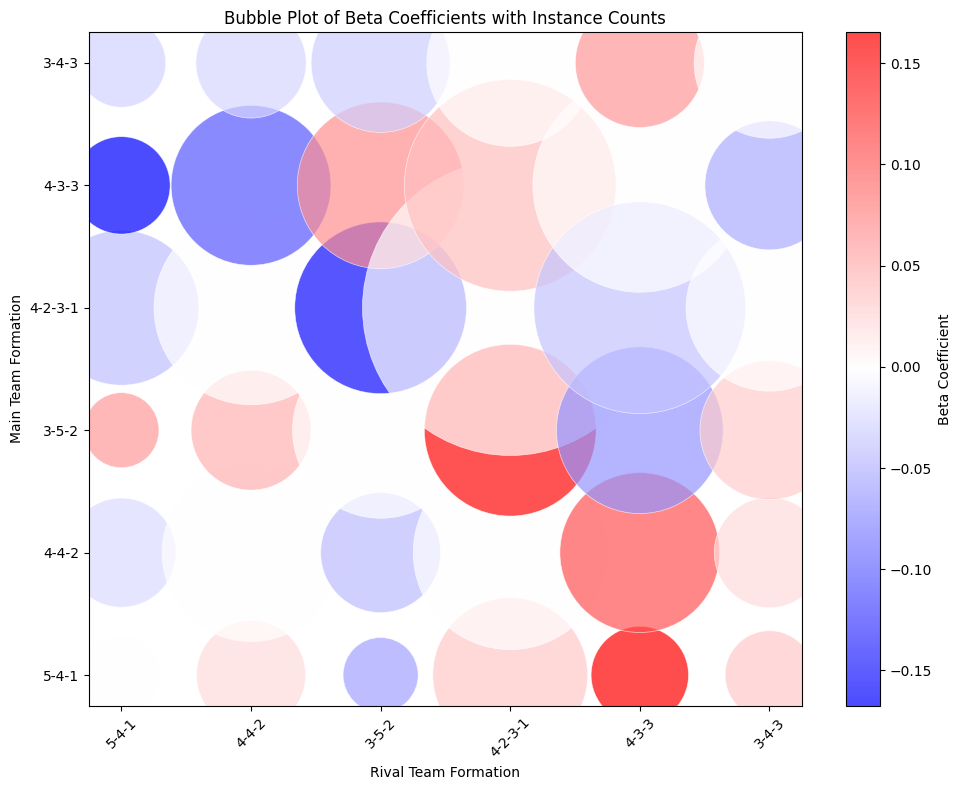

In [68]:
#Create a matrix which gets the betas from above (from 1 to n^2-1), and outputs a matrix of n*n betas, which contains the labels of
# the list sorted_formations , being the rows main_team_formation and the columns rival_team_formation. The value n^2 will be equal to 0, since 
# it is the last formation which can be inferred from the others.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_beta_matrix(betas, sorted_formations):
    """
    Creates a matrix of beta coefficients from a list, where rows and columns
    represent main and rival team formations.

    Args:
        betas (list-like): List of beta coefficients (excluding the intercept).
        sorted_formations (list): List of formation labels, sorted.

    Returns:
        pd.DataFrame: A DataFrame representing the beta matrix with formations
                      as index and columns. The last cell is set to NaN for
                      better visualization.
    """
    n = len(sorted_formations)
    beta_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == n - 1 and j == n - 1:  # Last formation
                beta_matrix[i, j] = np.nan  # Use NaN for the last cell
            else:
                # beta_matrix[i, j] = betas[i * n + j + 1]  # +1 to skip intercept
                beta_matrix[i, j] = betas[i * n + j]  # NO INTERCEPT

                

    beta_df = pd.DataFrame(beta_matrix, index=sorted_formations, columns=sorted_formations)
    beta_df.index.name = "main_team_formation"
    beta_df.columns.name = "rival_team_formation"
    return beta_df


beta_df = create_beta_matrix(betas, sorted_formations)

# # Add the result of -betas.sum() to the last value of the matrix
beta_df.iloc[-1, -1] = 0
beta_df = beta_df.applymap(lambda x: 0 if pd.notna(x) and abs(x) < 1e-2 else x)

# Visualize the beta matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
# Calculate the number of instances for each combination of main_team_formation and rival_team_formation
instance_counts = df_data["combined_formation"].value_counts()

# Add the instance counts as bubble sizes to the beta matrix
bubble_sizes = beta_df.copy()
for main_formation in sorted_formations:
    for rival_formation in sorted_formations:
        combined = f"{main_formation}/{rival_formation}"
        bubble_sizes.loc[main_formation, rival_formation] = instance_counts.get(combined, 0)

# Create the bubble plot
plt.scatter(
    x=np.repeat(beta_df.columns.values, len(beta_df.index)),
    y=np.tile(beta_df.index.values, len(beta_df.columns)),
    s=bubble_sizes.values.flatten() * 10,  # Scale bubble sizes for better visualization
    c=beta_df.values.flatten(),
    cmap="bwr",  # Blue for positive, Red for negative
    alpha=0.7,
    edgecolors="w",
    linewidth=0.5
)
plt.colorbar(label="Beta Coefficient")
plt.xticks(rotation=45)
plt.title("Bubble Plot of Beta Coefficients with Instance Counts")
plt.ylabel("Main Team Formation")
plt.xlabel("Rival Team Formation")
plt.tight_layout()
plt.show()

C:\Users\genis\AppData\Local\Temp\ipykernel_61520\3291117429.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00
(ns)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.loc[row, col] = f"{beta_df.loc[row, col]:.2f}\n({pvalue_annotation})"
C:\Users\genis\AppData\Local\Temp\ipykernel_61520\3291117429.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.02
(ns)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.loc[row, col] = f"{beta_df.loc[row, col]:.2f}\n({pvalue_annotation})"
C:\Users\genis\AppData\Local\Temp\ipykernel_61520\3291117429.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.06
(ns)' has dtype incompatible with float64, please explicitly cast to

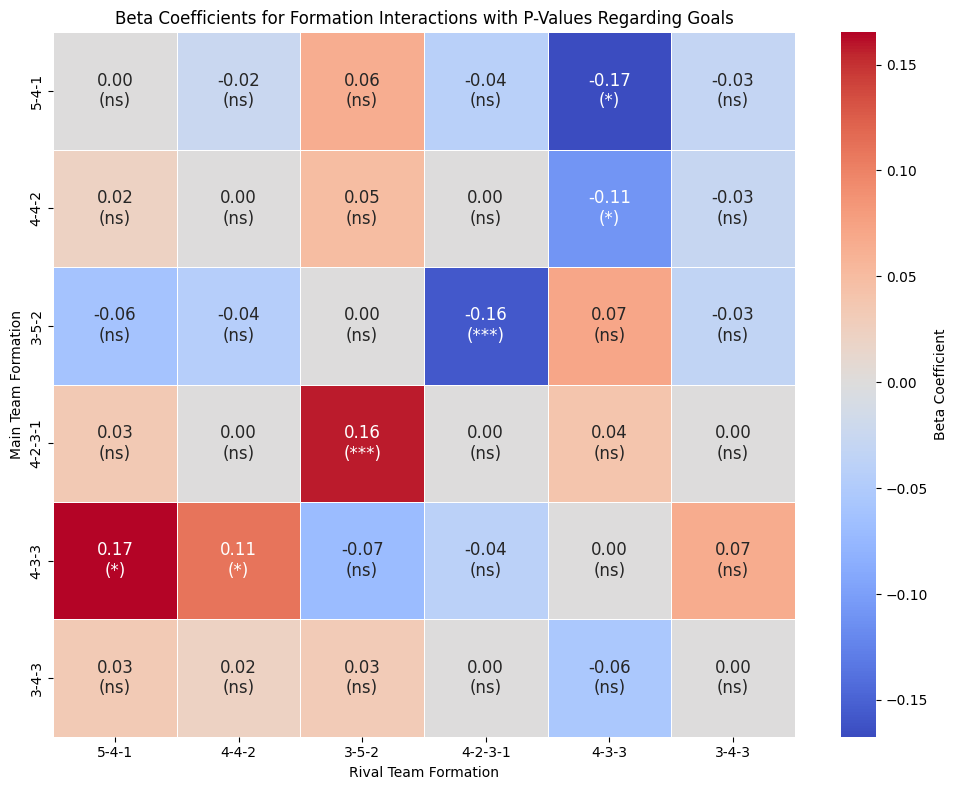

In [69]:
# Visualize the beta matrix using seaborn heatmap with p-values
plt.figure(figsize=(10, 8))

# Create a new DataFrame for annotations with coefficients and p-values
annotations = beta_df.copy()
for i, row in enumerate(beta_df.index):
    for j, col in enumerate(beta_df.columns):
        if not pd.isna(beta_df.loc[row, col]):
            beta_key = f"beta{i * len(beta_df.columns) + j + 1}"  # Construct the beta key
            if beta_key in pvalue_dict:
                pvalue_annotation = pvalue_dict[beta_key][1]  # Get the significance level (e.g., "***")
                annotations.loc[row, col] = f"{beta_df.loc[row, col]:.2f}\n({pvalue_annotation})"
            else:
                annotations.loc[row, col] = f"{beta_df.loc[row, col]:.2f}"

sns.heatmap(beta_df, annot=annotations, fmt="", cmap='coolwarm', linewidths=.6, cbar_kws={'label': 'Beta Coefficient'},annot_kws={"size": 12})
plt.title("Beta Coefficients for Formation Interactions with P-Values Regarding Goals")
plt.ylabel("Main Team Formation")
plt.xlabel("Rival Team Formation")
plt.tight_layout()
plt.show()


In [41]:
beta_df.to_csv("Matriu_goals_diff.csv")

In [32]:
betas

x1     0.000689
x2     0.025983
x3    -0.062906
x4     0.043133
x5     0.168593
x6     0.031776
x7    -0.019879
x8     0.002717
x9    -0.047144
x10    0.003210
x11    0.110631
x12    0.028381
x13    0.062960
x14    0.045920
x15    0.001982
x16    0.158420
x17   -0.070038
x18    0.033699
x19   -0.033620
x20    0.000124
x21   -0.157297
x22    0.004280
x23   -0.038938
x24   -0.006053
x25   -0.163997
x26   -0.109286
x27    0.071352
x28    0.040567
x29    0.000387
x30   -0.064586
x31   -0.032281
x32   -0.020304
x33   -0.030443
x34    0.009144
x35    0.056505
dtype: float64

In [106]:
betas.sum()

0.043685084248665684

(0.4532467290655627, 0.48346249340670766)